In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
import data_process as dp

In [3]:
path = '/code/src/Preprocessed_FedCycleData.csv.csv'

cycle_data = dp.read_data(path)
print(cycle_data.shape)
cycle_data.head()

Failed to read as Excel: Excel file format cannot be determined, you must specify an engine manually.
Attempting to read as CSV with encoding detection...
Chardet detected encoding: ascii
File read successfully with detected encoding.
(1183, 23)


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,TotalFertilityFormula,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,nfp8122,1,0,1,0,29,17,12,12,5,...,15,5,3,3,2,1,10,5,1,0
1,nfp8122,2,0,1,0,27,15,12,13,2,...,13,5,3,3,2,1,10,6,1,0
2,nfp8122,4,0,1,0,27,15,12,13,2,...,13,5,3,3,3,2,12,3,0,0
3,nfp8122,5,0,1,0,28,16,12,12,4,...,14,5,3,3,2,2,11,5,1,0
4,nfp8122,6,0,1,0,26,15,11,10,5,...,13,5,3,3,2,1,10,4,1,0


In [4]:
droped = ['ClientID']

cycle_data_num = cycle_data.drop(droped, axis=1)

print(cycle_data_num.info())
print(cycle_data_num.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CycleNumber                 1183 non-null   int64
 1   Group                       1183 non-null   int64
 2   CycleWithPeakorNot          1183 non-null   int64
 3   ReproductiveCategory        1183 non-null   int64
 4   LengthofCycle               1183 non-null   int64
 5   EstimatedDayofOvulation     1183 non-null   int64
 6   LengthofLutealPhase         1183 non-null   int64
 7   FirstDayofHigh              1183 non-null   int64
 8   TotalNumberofHighDays       1183 non-null   int64
 9   TotalHighPostPeak           1183 non-null   int64
 10  TotalNumberofPeakDays       1183 non-null   int64
 11  TotalDaysofFertility        1183 non-null   int64
 12  TotalFertilityFormula       1183 non-null   int64
 13  LengthofMenses              1183 non-null   int64
 14  MensesSc

In [5]:
for col in cycle_data_num.columns:
    unique_vals = cycle_data_num[col].unique()
    print(f"Unique values in column '{col}': {unique_vals}")

Unique values in column 'CycleNumber': [ 1  2  4  5  6  9 10 11 12 13 14 15 16 17 20 21 23 24 25 26 27 28 29 30
 32 34 35 38 39 41 43 44 45  3  7  8 19 22 18 31 33 40]
Unique values in column 'Group': [0 1]
Unique values in column 'CycleWithPeakorNot': [1 0]
Unique values in column 'ReproductiveCategory': [0 1 2 9]
Unique values in column 'LengthofCycle': [29 27 28 26 30 25 32 31 23 24 34 33 35 41 38 36 21 37 39 22 40 42 43 48
 45 51]
Unique values in column 'EstimatedDayofOvulation': [17 15 16 14 18 19 11 13 12 27 22 20 21 10 23  9 24 25  8 29 28 26]
Unique values in column 'LengthofLutealPhase': [12 11 13 10  9  8 14  4 15 16 18 17 20 19 22  7 21 24  6 23  1  5 28 26
 41 34 27 29]
Unique values in column 'FirstDayofHigh': [12 13 10  9  8 14 11 16  6 15 21  7 17 19 18  5 20 22 25 23 24]
Unique values in column 'TotalNumberofHighDays': [ 5  2  4  7  6 11  3 10  1  8 13  9 14 12  0 19 16 17 15]
Unique values in column 'TotalHighPostPeak': [0 1 2 5 3 4 6 7]
Unique values in column 'Total

In [6]:
# Set your threshold for unique values (change this as needed)
threshold = 4

# Identify columns for each dataframe
freq_cols = [col for col in cycle_data_num.columns
             if cycle_data_num[col].nunique() <= threshold]
stat_cols = [col for col in cycle_data_num.columns
             if cycle_data_num[col].nunique() > threshold]

# Create the two new dataframes
freq_data = cycle_data_num[freq_cols]
stat_data = cycle_data_num[stat_cols]

# Optionally, display the first few rows of each
print("Frequency Data (columns with <=4 unique values):")
print(freq_data.head())
print("\nSummary Statistics Data (columns with >4 unique values):")
print(stat_data.head())

Frequency Data (columns with <=4 unique values):
   Group  CycleWithPeakorNot  ReproductiveCategory  MensesScoreDayOne  \
0      0                   1                     0                  3   
1      0                   1                     0                  3   
2      0                   1                     0                  3   
3      0                   1                     0                  3   
4      0                   1                     0                  3   

   MensesScoreDayTwo  MensesScoreDayThree  MensesScoreDayFour  \
0                  3                    2                   1   
1                  3                    2                   1   
2                  3                    3                   2   
3                  3                    2                   2   
4                  3                    2                   1   

   IntercourseInFertileWindow  UnusualBleeding  
0                           1                0  
1                      

In [7]:
stat_data.describe()

,CycleNumber,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,TotalFertilityFormula,LengthofMenses,TotalMensesScore,NumberofDaysofIntercourse
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,7.766695,29.317836,16.086221,13.213863,11.727811,4.234996,0.168216,2.071851,8.346577,13.918005,5.436179,10.197802,4.420118
std,6.439725,3.704218,3.501173,2.762587,3.193208,2.513024,0.679358,1.138056,2.674677,3.382178,1.173210,2.648901,3.035632
min,1.000000,21.000000,8.000000,1.000000,5.000000,0.000000,0.000000,0.000000,2.000000,6.000000,3.000000,5.000000,0.000000
25%,3.000000,27.000000,14.000000,12.000000,10.000000,2.000000,0.000000,2.000000,6.000000,12.000000,5.000000,8.000000,2.000000
50%,7.000000,29.000000,15.000000,13.000000,11.000000,4.000000,0.000000,2.000000,8.000000,13.000000,5.000000,10.000000,4.000000
75%,10.000000,31.000000,18.000000,14.000000,13.000000,5.000000,0.000000,2.000000,10.000000,16.000000,6.000000,12.000000,6.000000
max,45.000000,51.000000,29.000000,41.000000,25.000000,19.000000,7.000000,13.000000,27.000000,33.000000,15.000000,24.000000,19.000000


In [29]:
import pandas as pd

# Load your dataset (if not already loaded)
file_path = 'Preprocessed_FedCycleData.csv.csv'
cycle_data = pd.read_csv(file_path)

# Define threshold for stat_data (as in previous steps)
threshold = 4
stat_cols = [col for col in cycle_data.columns if cycle_data[col].nunique() > threshold]
stat_data = cycle_data[stat_cols]

# Get describe for each feature individually
for col in stat_data.columns:
    print(f"{col}")
    print(stat_data[col].describe())
    print()  # Add a blank line for readability


ClientID
count        1183
unique        149
top       nfp8122
freq           36
Name: ClientID, dtype: object

CycleNumber
count    1183.000000
mean        7.766695
std         6.439725
min         1.000000
25%         3.000000
50%         7.000000
75%        10.000000
max        45.000000
Name: CycleNumber, dtype: float64

LengthofCycle
count    1183.000000
mean       29.317836
std         3.704218
min        21.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        51.000000
Name: LengthofCycle, dtype: float64

EstimatedDayofOvulation
count    1183.000000
mean       16.086221
std         3.501173
min         8.000000
25%        14.000000
50%        15.000000
75%        18.000000
max        29.000000
Name: EstimatedDayofOvulation, dtype: float64

LengthofLutealPhase
count    1183.000000
mean       13.213863
std         2.762587
min         1.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        41.000000
Name: LengthofLutealPhase, 

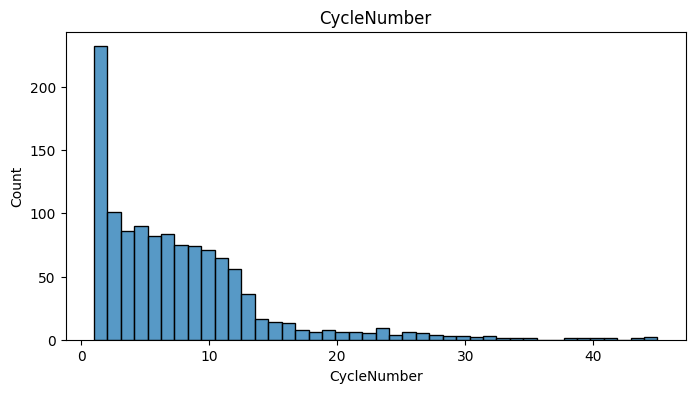

Pie chart skipped for CycleNumber: too many unique values (42)


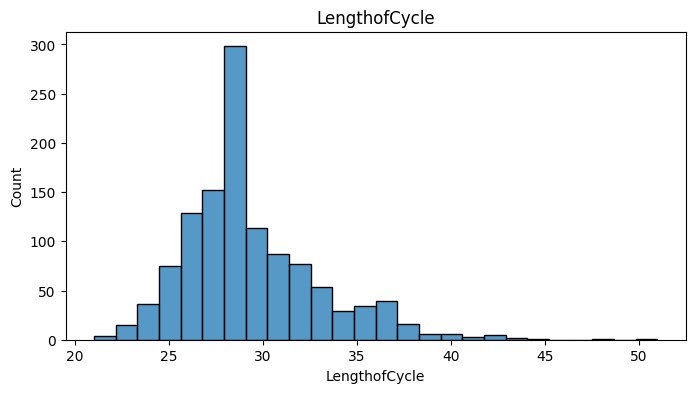

Pie chart skipped for LengthofCycle: too many unique values (26)


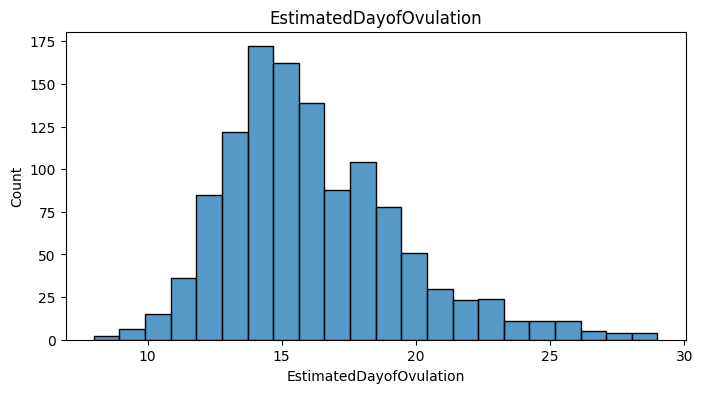

Pie chart skipped for EstimatedDayofOvulation: too many unique values (22)


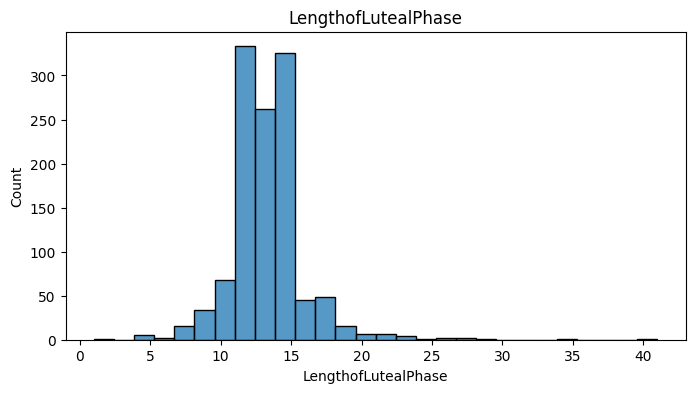

Pie chart skipped for LengthofLutealPhase: too many unique values (28)


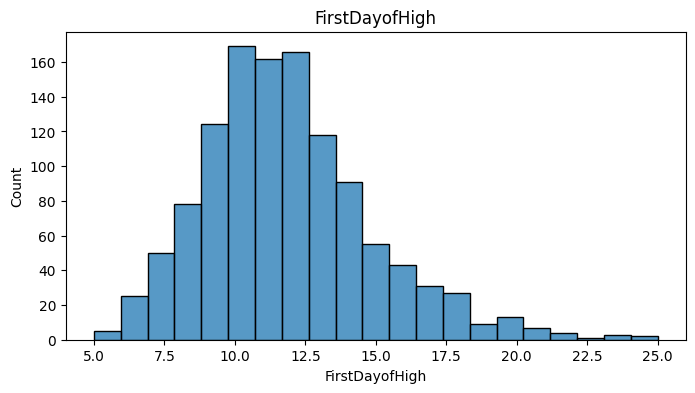

Pie chart skipped for FirstDayofHigh: too many unique values (21)


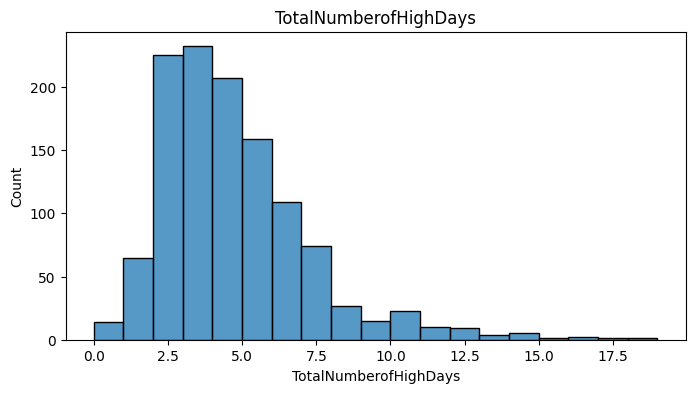

Pie chart skipped for TotalNumberofHighDays: too many unique values (19)


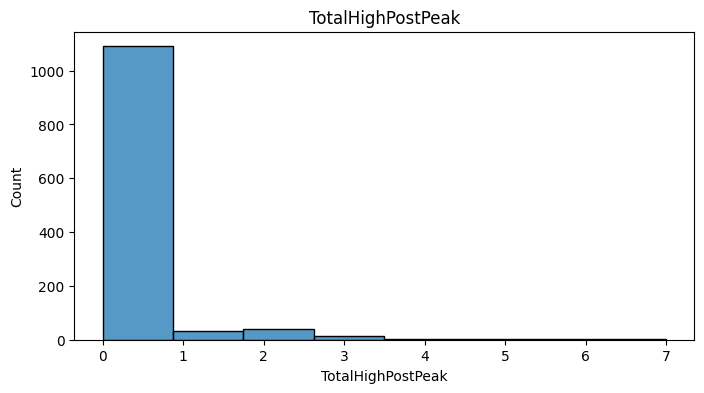

Pie chart skipped for TotalHighPostPeak: too many unique values (8)


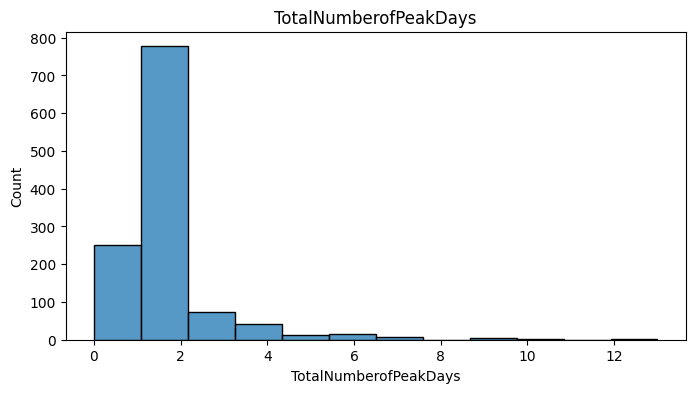

Pie chart skipped for TotalNumberofPeakDays: too many unique values (12)


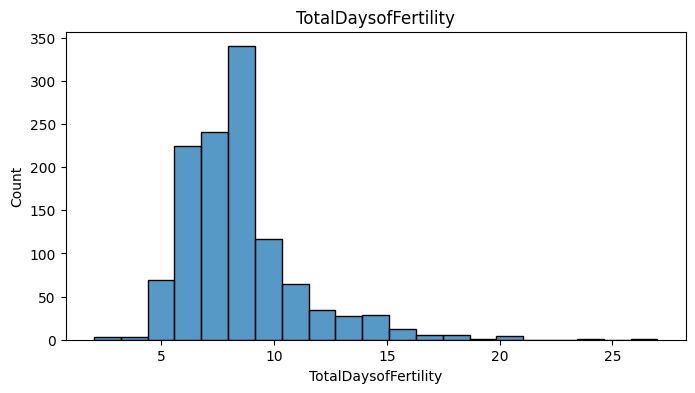

Pie chart skipped for TotalDaysofFertility: too many unique values (21)


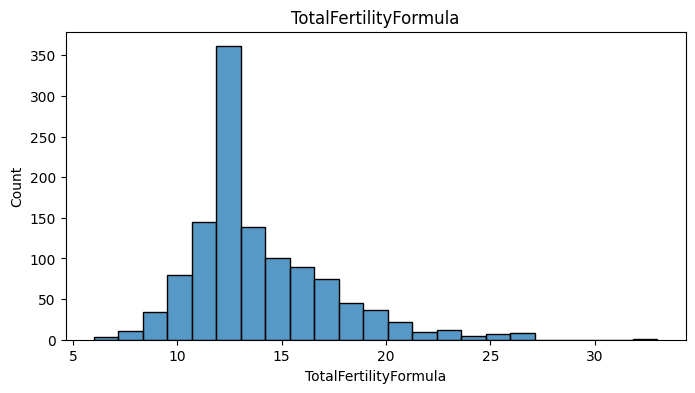

Pie chart skipped for TotalFertilityFormula: too many unique values (23)


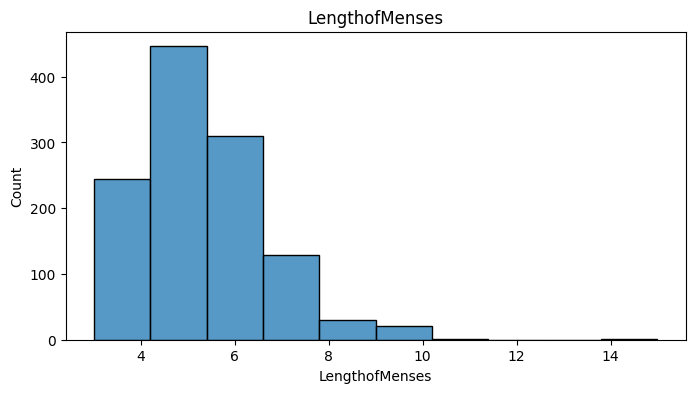

Pie chart skipped for LengthofMenses: too many unique values (10)


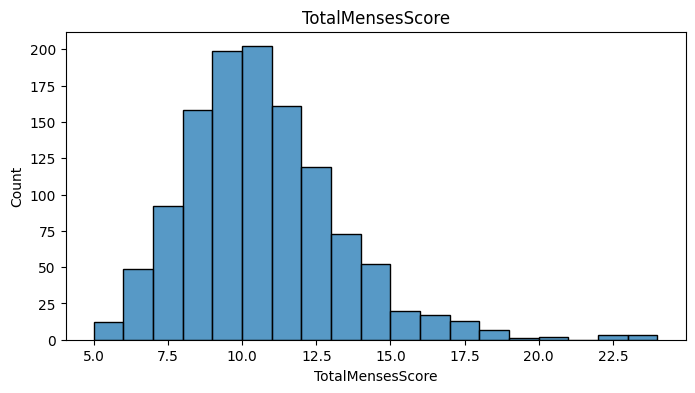

Pie chart skipped for TotalMensesScore: too many unique values (19)


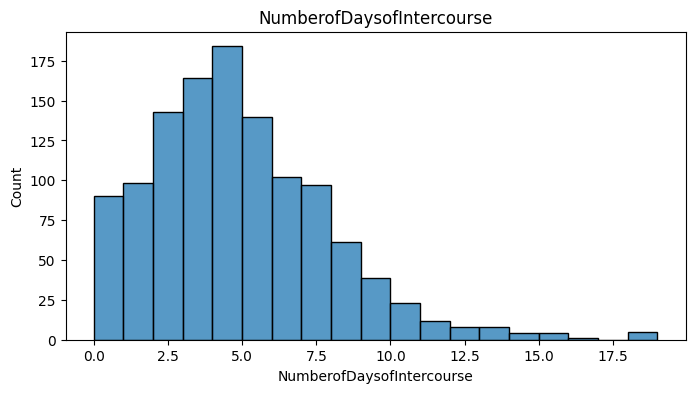

Pie chart skipped for NumberofDaysofIntercourse: too many unique values (19)


In [27]:
# For each feature in stat_data, plot bar and pie charts (if unique values ≤ 5)
for col in stat_data.columns:
    unique_count = stat_data[col].nunique()
    
    # Bar chart (always)
    plt.figure(figsize=(8, 4))
    sns.histplot(stat_data[col], bins=unique_count, kde=False)
    plt.title(f'{col}')
    plt.show()
    
    # Pie chart only if unique values ≤ 5
    if unique_count <= 5:
        value_counts = stat_data[col].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f'Pie Chart for {col}')
        plt.show()
    else:
        print(f"Pie chart skipped for {col}: too many unique values ({unique_count})")


In [9]:
# Generate frequency tables for each column in freq_data
for col in freq_data.columns:
    print(f"Frequency table for column: {col}")
    print(freq_data[col].value_counts().sort_index())
    print()  # Add a blank line for readability

Frequency table for column: Group
Group
0    640
1    543
Name: count, dtype: int64

Frequency table for column: CycleWithPeakorNot
CycleWithPeakorNot
0       2
1    1181
Name: count, dtype: int64

Frequency table for column: ReproductiveCategory
ReproductiveCategory
0    1134
1      42
2       3
9       4
Name: count, dtype: int64

Frequency table for column: MensesScoreDayOne
MensesScoreDayOne
1    265
2    366
3    552
Name: count, dtype: int64

Frequency table for column: MensesScoreDayTwo
MensesScoreDayTwo
1     62
2    390
3    731
Name: count, dtype: int64

Frequency table for column: MensesScoreDayThree
MensesScoreDayThree
1    206
2    641
3    336
Name: count, dtype: int64

Frequency table for column: MensesScoreDayFour
MensesScoreDayFour
1    648
2    415
3    120
Name: count, dtype: int64

Frequency table for column: IntercourseInFertileWindow
IntercourseInFertileWindow
0    748
1    435
Name: count, dtype: int64

Frequency table for column: UnusualBleeding
UnusualBleeding


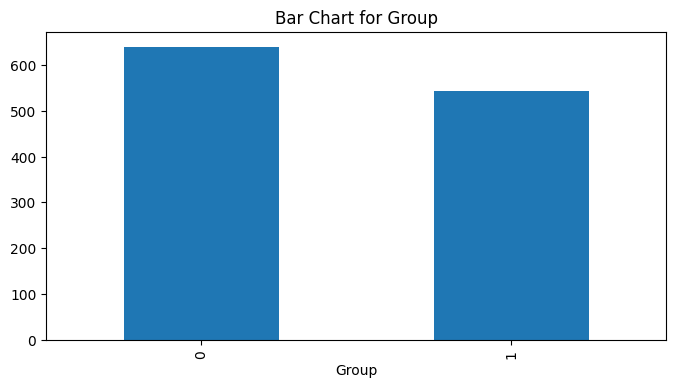

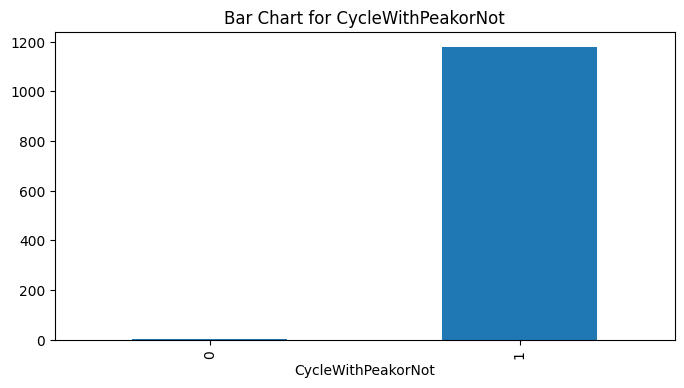

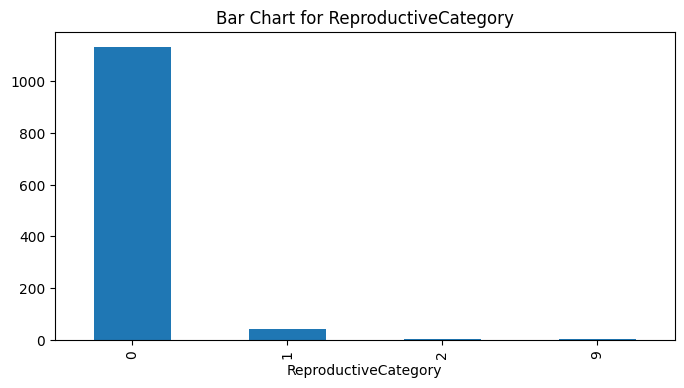

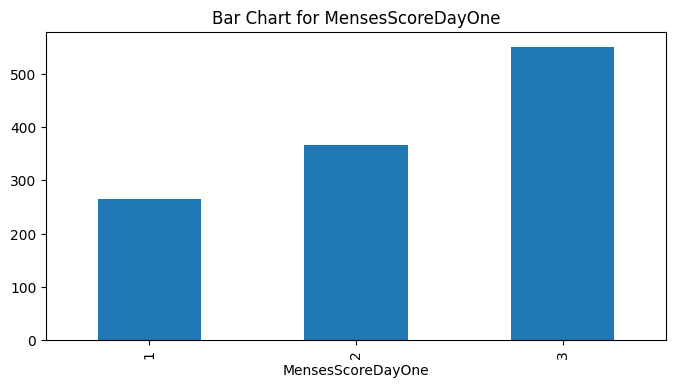

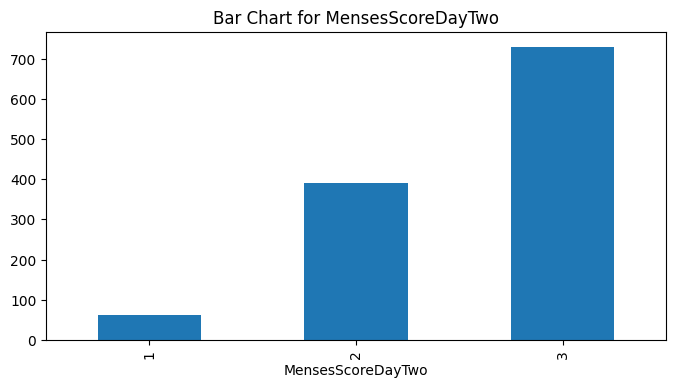

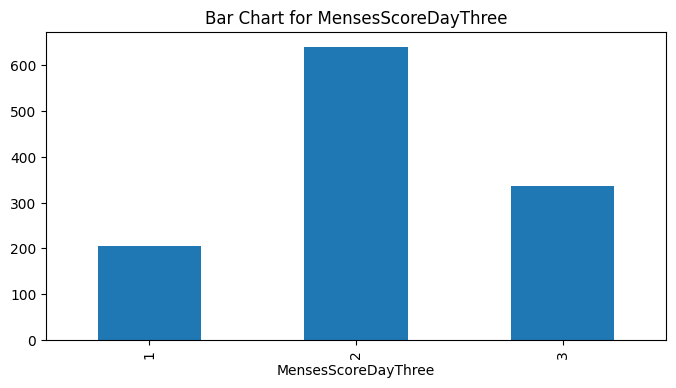

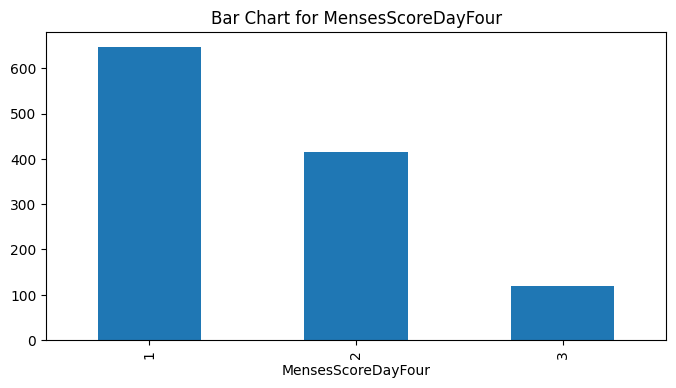

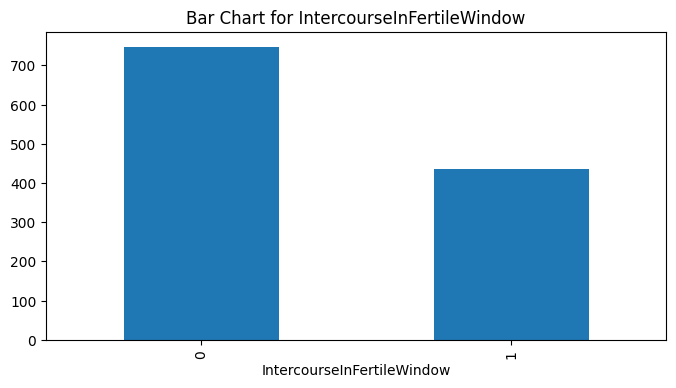

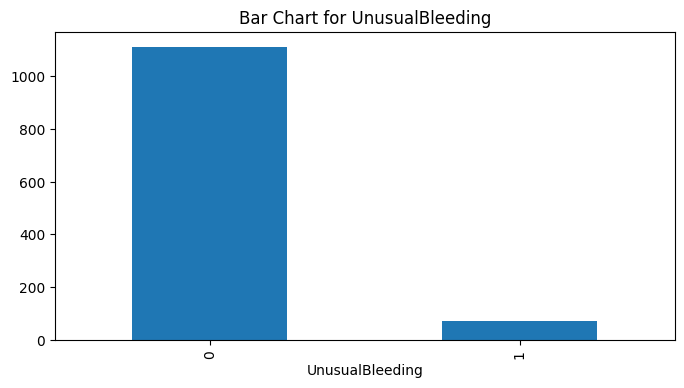

In [10]:
for col in freq_data.columns:
    value_counts = freq_data[col].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    value_counts.plot(kind='bar')
    plt.title(f'Bar Chart for {col}')
    plt.show()



<Axes: >

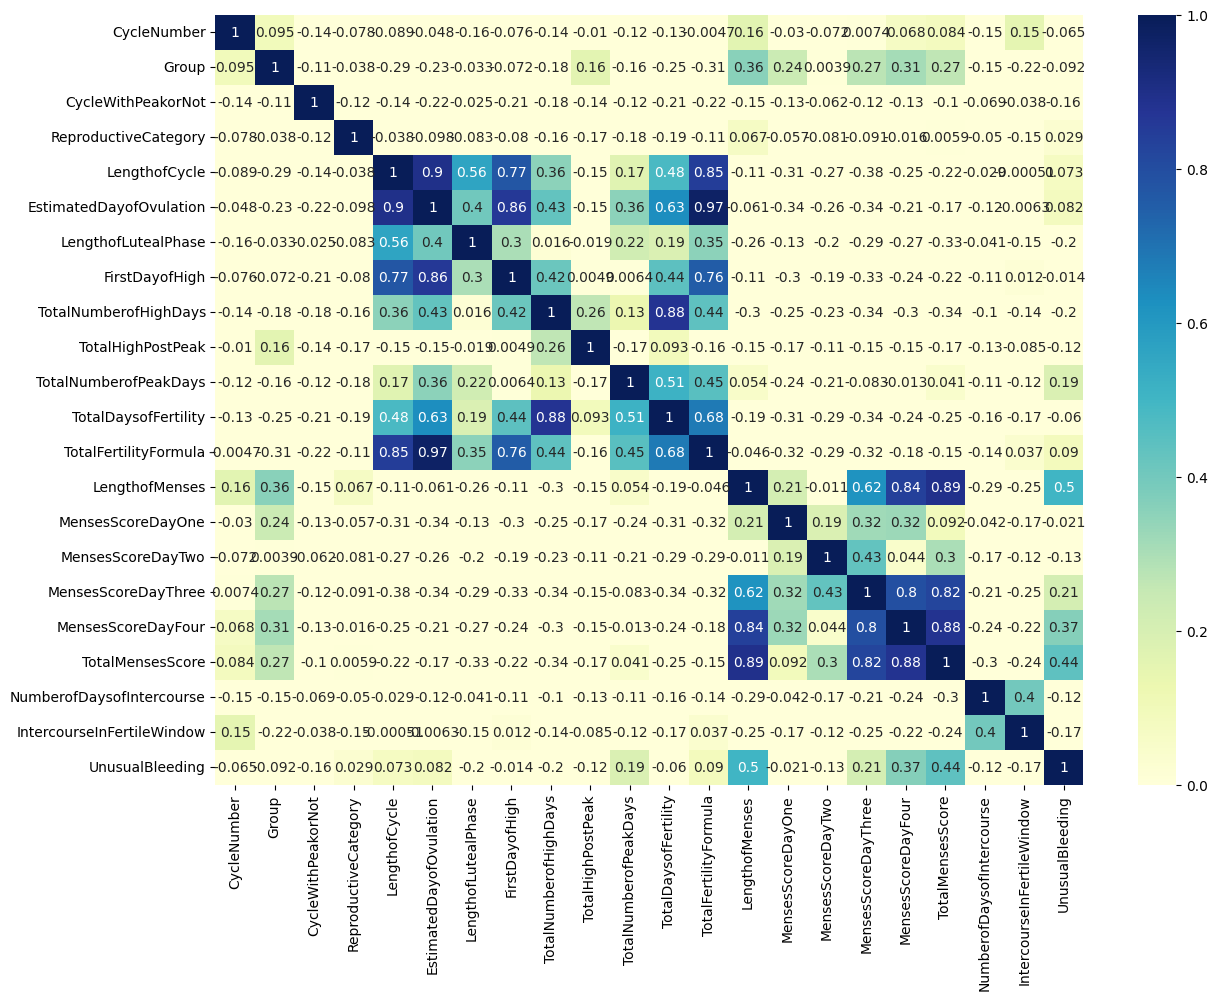

In [11]:
corr_matrix = cycle_data_num.corr().abs()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix.corr(), annot=True, vmin= 0, cmap='YlGnBu')

In [12]:
np.fill_diagonal(corr_matrix.values, 0)

threshold = 0.3

# Extract absolute correlations with the target feature
target_correlations = corr_matrix['LengthofCycle'].abs().drop('LengthofCycle')

# Identify features below the threshold
detached_features = target_correlations[target_correlations < threshold].index.tolist()

# Drop low-correlation features from the DataFrame
cycle_data_filtered = cycle_data_num.drop(columns=detached_features)

print(f"Detached features: {detached_features}")

Detached features: ['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding']


In [13]:
for col in cycle_data_filtered.columns:
    print(col)

LengthofCycle
EstimatedDayofOvulation
LengthofLutealPhase
FirstDayofHigh
TotalDaysofFertility
TotalFertilityFormula


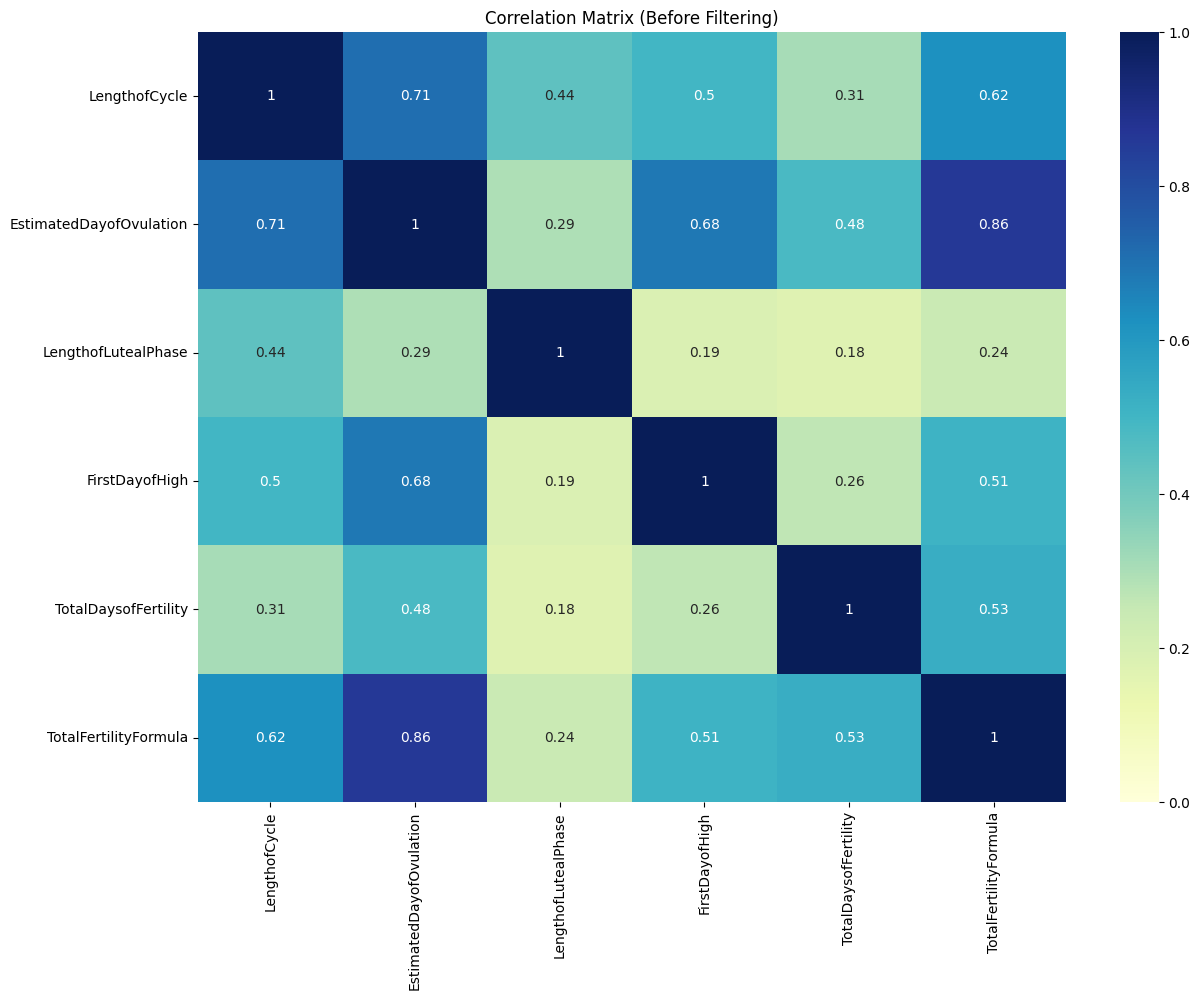

In [14]:
corr_filtered = cycle_data_filtered.corr().abs()

plt.figure(figsize=(14,10))
sns.heatmap(corr_filtered, annot=True, vmin=0, cmap='YlGnBu')
plt.title("Correlation Matrix (Before Filtering)")
plt.show()


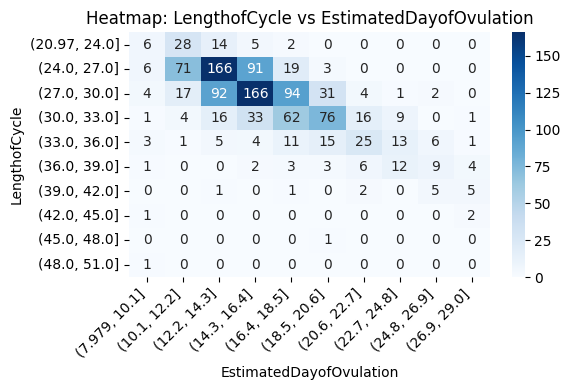

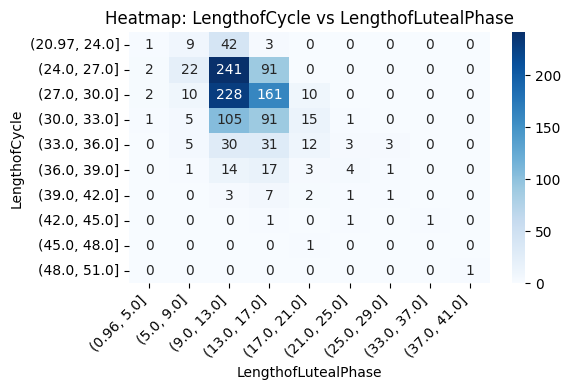

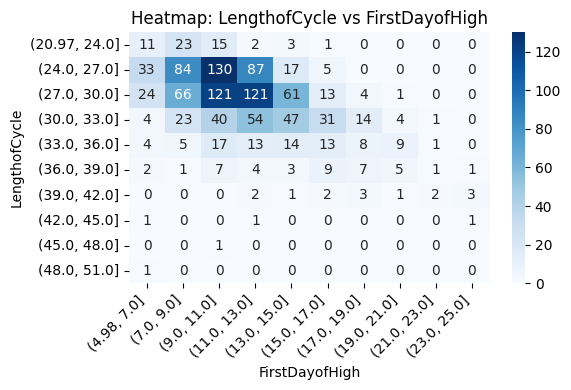

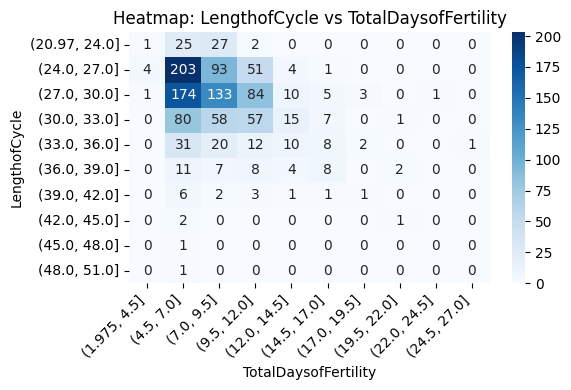

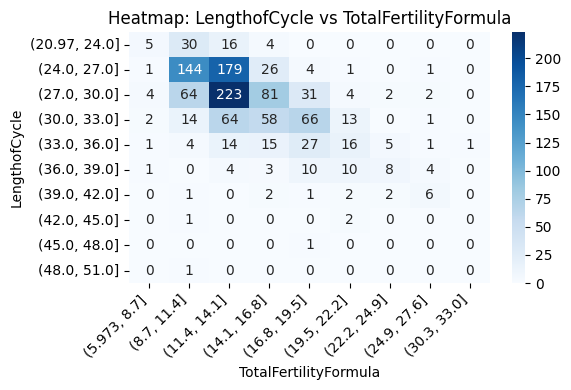

In [19]:
features = ['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalDaysofFertility', 'TotalFertilityFormula']

# Bin the LengthofCycle into 10 bins (adjust as needed)
cycle_data_filtered['LengthofCycle_bin'] = pd.cut(cycle_data_filtered['LengthofCycle'], bins=10)

for feature in features:
    # Bin the other feature into 10 bins (adjust as needed)
    cycle_data_filtered[f'{feature}_bin'] = pd.cut(cycle_data_filtered[feature], bins=10)
    
    # Create cross-tabulation
    crosstab = pd.crosstab(
        cycle_data_filtered['LengthofCycle_bin'],
        cycle_data_filtered[f'{feature}_bin']
    )
    
    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
    plt.xlabel(feature)
    plt.ylabel('LengthofCycle')
    plt.title(f'Heatmap: LengthofCycle vs {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


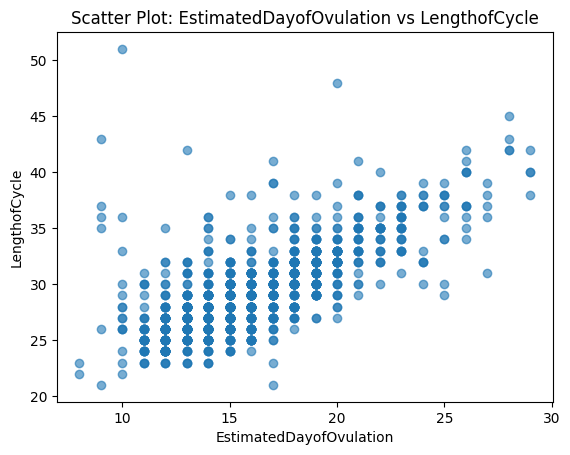

In [20]:


plt.scatter(
    cycle_data_filtered['EstimatedDayofOvulation'],
    cycle_data_filtered['LengthofCycle'],
    alpha=0.6  # Optional: makes points semi-transparent
)
plt.xlabel('EstimatedDayofOvulation')
plt.ylabel('LengthofCycle')
plt.title('Scatter Plot: EstimatedDayofOvulation vs LengthofCycle')
plt.show()


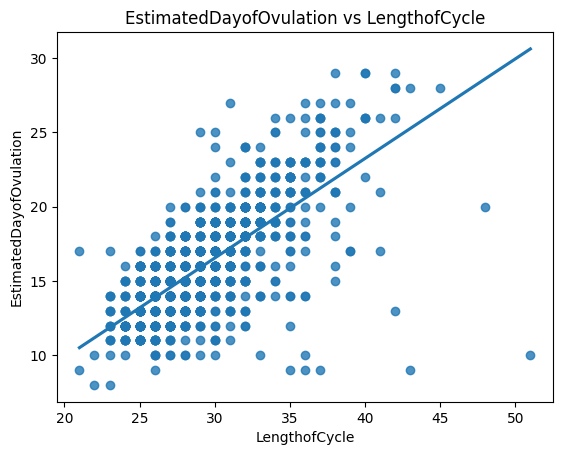

In [26]:

sns.regplot(x='LengthofCycle', y='EstimatedDayofOvulation', data=cycle_data_filtered, ci=None)
plt.xlabel('LengthofCycle')
plt.ylabel('EstimatedDayofOvulation')
plt.title('EstimatedDayofOvulation vs LengthofCycle')
plt.show()